# Análisis de datos de un panel de miniMuTe 

### Arreglo de centelladores

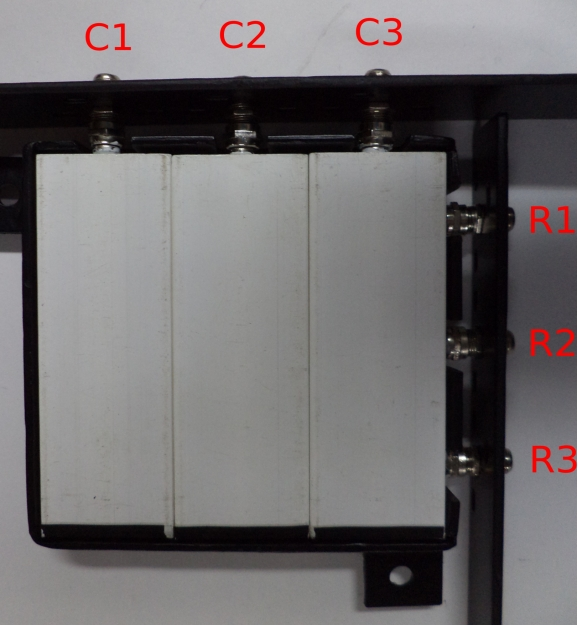

In [5]:
from IPython.display import Image
Image(filename='figures/Panel.jpg')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

In [7]:
data = np.loadtxt('data/miniMuTe/Pulses_Volcan.dat')
tiempo = data[:,0]
data = data[:,1:65]
N = len(data)
print ('Pulsos = ' + str(N))
nBars  = 3
tiempo[1]

Pulsos = 60021


1500651768.0

### Conteo de eventos por píxel Panel 1

In [8]:
matrix = np.zeros((nBars,nBars))
sum_columns = np.zeros(nBars)
sum_rows = np.zeros(nBars)

sum_cl1 = 0
sum_cl2 = 0
sum_cl3 = 0

sum_rw1 = 0
sum_rw2 = 0
sum_rw3 = 0

for k in range (N):
    
    # Panel 1 (columns 1-17-25) (rows 33-41-57)
    
    columns = np.asarray([data[k][1], data[k][17], data[k][25]])
    rows = np.asarray([data[k][33], data[k][41], data[k][57]])
    
    if (np.sum(data[k][:]) <= 2):    # Condición de activación de una o dos barras
        
        sum_cl1 = sum_cl1 + data[k][1]
        sum_cl2 = sum_cl2 + data[k][17]
        sum_cl3 = sum_cl3 + data[k][25]
    
        sum_rw1 = sum_rw1 + data[k][33]
        sum_rw2 = sum_rw2 + data[k][41]
        sum_rw3 = sum_rw3 + data[k][57]
    
    for i in range(nBars):
        for j in range(nBars):
            if (np.sum(data[k][:]) == 2):   # Condición de activación de solo 2 barras
                matrix[i,j]= matrix[i,j] + rows[i]*columns[j]
            
sum_columns = [sum_cl1, sum_cl2, sum_cl3]
sum_rows = [sum_rw1, sum_rw2, sum_rw3]

signal = np.sum(sum_columns) + np.sum(sum_rows)

print ('Pixel counts Panel 1')
print matrix

print ('Column counts Panel 1')
print sum_columns

print ('Row counts Panel 1')
print sum_rows

print ('Signal to Noise Ratio (SNR) Panel 1')
print signal/N

Pixel counts Panel 1
[[39. 30. 34.]
 [44. 23. 18.]
 [42. 46. 29.]]
Column counts Panel 1
[347.0, 357.0, 392.0]
Row counts Panel 1
[444.0, 418.0, 414.0]
Signal to Noise Ratio (SNR) Panel 1
0.0395195015078056


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


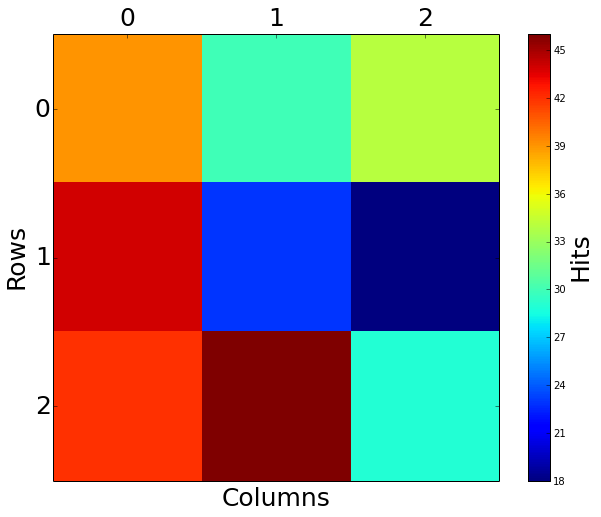

In [9]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
im = plt.imshow(matrix, interpolation='nearest', origin='low')

ax.invert_yaxis()
ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)

### 3D histogram

/usr/lib/pymodules/python2.7/mpl_toolkits/mplot3d/axes3d.py:2307: UserWarning: x, y, and z must be the same length.
  warnings.warn('x, y, and z must be the same length.')


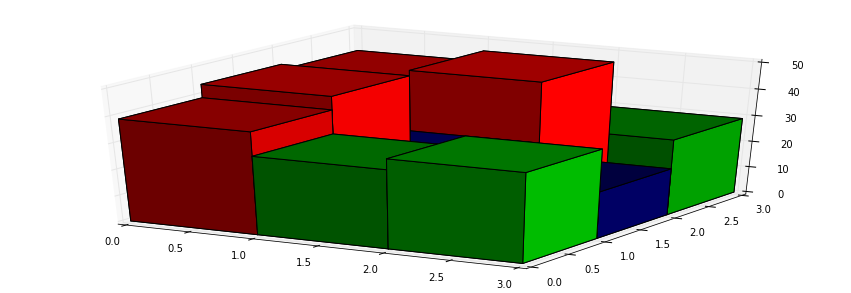

In [10]:
data_array = np.array(matrix)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]), np.arange(data_array.shape[0]) )

x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()


for i in range(len(x_data)):
    if (z_data[i] > 0.8*np.max(z_data) ):
        color = [1,0,0]
    elif (z_data[i] <= 0.8*np.max(z_data) and z_data[i] > 0.6*np.max(z_data)):
        color = [0,1,0]
    else:
        color = [0,0,1]
    ax.bar3d( x_data[i], y_data[i], np.zeros(len(z_data)), 1, 1, z_data[i], color = np.dot(color,z_data[i]/np.max(z_data)))

#ax.bar3d( x_data, y_data, np.zeros(len(z_data)), 1, 1, z_data, color='r')


### Conteo de eventos por píxel Panel 2

In [11]:
matrix = np.zeros((nBars,nBars))
sum_columns = np.zeros(nBars)
sum_rows = np.zeros(nBars)

sum_cl1 = 0
sum_cl2 = 0
sum_cl3 = 0

sum_rw1 = 0
sum_rw2 = 0
sum_rw3 = 0

for k in range (N):
    
    # Panel 2 (columns 14-22-30) (rows 38-54-62)
    
    columns = np.asarray([data[k][14], data[k][22], data[k][30]])
    rows = np.asarray([data[k][38], data[k][54], data[k][62]])
    
    if (np.sum(data[k][:]) <= 2):    # Condición de activación de una o dos barras
        
        sum_cl1 = sum_cl1 + data[k][14]
        sum_cl2 = sum_cl2 + data[k][22]
        sum_cl3 = sum_cl3 + data[k][30]
    
        sum_rw1 = sum_rw1 + data[k][38]
        sum_rw2 = sum_rw2 + data[k][54]
        sum_rw3 = sum_rw3 + data[k][62]
    
    for i in range(nBars):
        for j in range(nBars):
            if (np.sum(data[k][:]) == 2):   # Condición de activación de solo 2 barras
                matrix[i,j]= matrix[i,j] + rows[i]*columns[j]
            
sum_columns = [sum_cl1, sum_cl2, sum_cl3]
sum_rows = [sum_rw1, sum_rw2, sum_rw3]

signal = np.sum(sum_columns) + np.sum(sum_rows)

print ('Pixel counts Panel 2')
print matrix

print ('Column counts Panel 2')
print sum_columns

print ('Row counts Panel 2')
print sum_rows

print ('Signal to Noise Ratio (SNR) Panel 2')
print signal/N

Pixel counts Panel 2
[[344. 277. 376.]
 [226. 371. 356.]
 [248. 271. 306.]]
Column counts Panel 2
[8726.0, 4547.0, 7357.0]
Row counts Panel 2
[5719.0, 5223.0, 7235.0]
Signal to Noise Ratio (SNR) Panel 2
0.6465570383699039


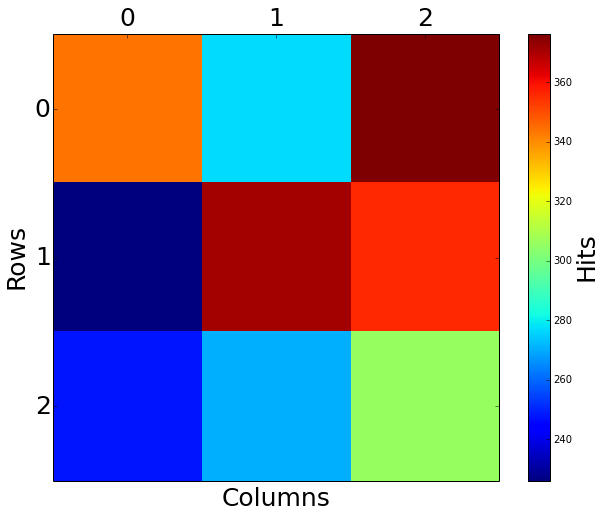

In [12]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
im = plt.imshow(matrix, interpolation='nearest', origin='low')

ax.invert_yaxis()
ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)

### 3D histogram Panel 2

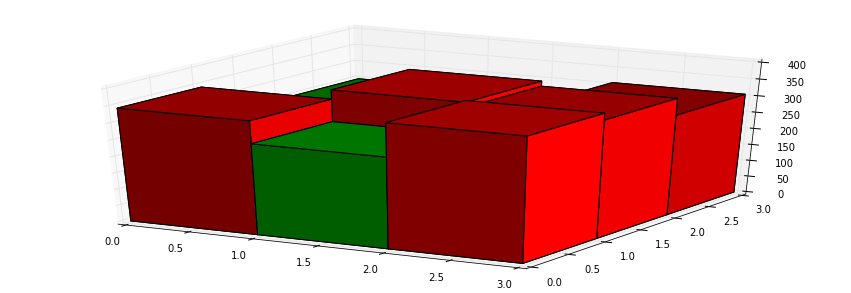

In [13]:
data_array = np.array(matrix)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]), np.arange(data_array.shape[0]) )

x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()


for i in range(len(x_data)):
    if (z_data[i] > 0.8*np.max(z_data) ):
        color = [1,0,0]
    elif (z_data[i] <= 0.8*np.max(z_data) and z_data[i] > 0.6*np.max(z_data)):
        color = [0,1,0]
    else:
        color = [0,0,1]
    ax.bar3d( x_data[i], y_data[i], np.zeros(len(z_data)), 1, 1, z_data[i], color = np.dot(color,z_data[i]/np.max(z_data)))

#ax.bar3d( x_data, y_data, np.zeros(len(z_data)), 1, 1, z_data, color='r')

### Histograma de todos los canales

In [14]:
hist_total = np.sum(data, axis=0)
chs = np.linspace(0, 63, num=64)

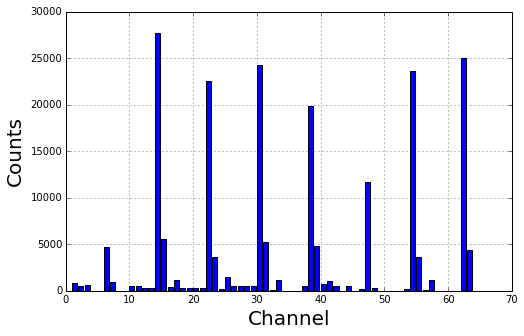

In [15]:
fig = plt.figure(figsize=(8, 5))
plt.bar(chs, hist_total)
plt.xlabel('Channel', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.grid()

### Frecuencia de eventos

In [16]:
temp = []
for k in range(len(tiempo)):
    if tiempo[k] < 1510651768:
        temp.append(tiempo[k])

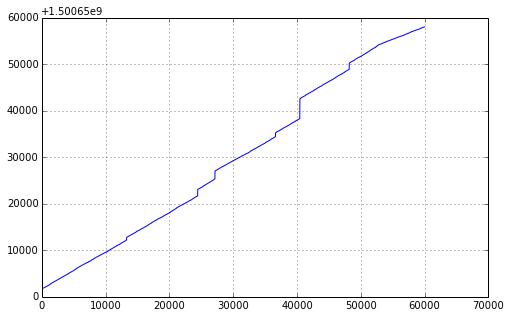

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(temp)
plt.grid()

In [20]:
lt = tiempo[0]
cont = 0
seg = []
for i in range(len(tiempo)):
    if tiempo[i] == lt:
        cont = cont + 1
        
    else:
        seg.append(cont)
        cont = 0
    lt = tiempo[i]

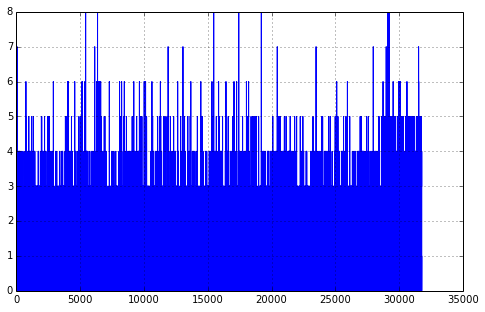

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(seg)
plt.grid()

In [23]:
lt = tiempo[0]
nt = lt + 60
cont = 0
minu = []
for i in range(len(tiempo)):
    if tiempo[i] >= lt and tiempo[i] <= nt:
        cont = cont + 1
        
    else:
        minu.append([tiempo[i],cont])
        cont = 0
        lt = tiempo[i]
        nt = lt + 60

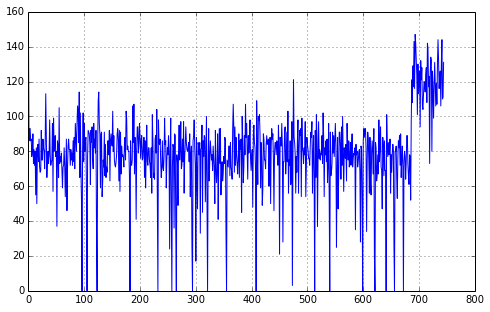

In [27]:
minu = np.asarray(minu)
plt.figure(figsize=(8, 5))
plt.plot( minu[:,1])
plt.grid()